<a href="https://colab.research.google.com/github/NVD1210/Data_Science/blob/main/Task2_GM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community.centrality import girvan_newman
from numpy.ma.core import append
import itertools
from networkx.algorithms.centrality.betweenness import edge_betweenness_centrality
import operator


In [ ]:
from collections import defaultdict

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
import statistics

from collections import Counter
from networkx.algorithms import *

from sklearn.cluster import KMeans
from sklearn.metrics import *
from sklearn.model_selection import *
from xgboost  import XGBClassifier

In [ ]:
df=pd.read_csv('gdrive/My Drive/Colab Notebooks/ub_sample_data.csv')
df = df.sort_values('user_id')
df.reset_index(drop=True, inplace=True)
df

,user_id,business_id
0,---1lKK3aKOuomHnwAkAow,dJUhEAq8SP-0vQ1aVU7vVA
1,---1lKK3aKOuomHnwAkAow,OPSNdO3LNPMt7qz1MNb42g
2,---1lKK3aKOuomHnwAkAow,bAU0v3UqPS20qMGwgI5rCg
3,---1lKK3aKOuomHnwAkAow,AVqjAx6j4HAvUb8t3_lv8Q
4,---1lKK3aKOuomHnwAkAow,zXaW8C2qtFHGVTETEcUX9g
...,...,...
38643,zzPvEodjvLPe-5NvV0U_cg,iw1WJt3wl6-NquZGKVamLw
38644,zzPvEodjvLPe-5NvV0U_cg,28yYO3uXuVZbE3YsvVHahg
38645,zzPvEodjvLPe-5NvV0U_cg,Lu5hB_5YtX5Re2067Zf3cg
38646,zzPvEodjvLPe-5NvV0U_cg,qRymrsLmlA34bC8PvNoujg


In [ ]:
MyDict =[
         {"user_id" : df.user_id[0],
          "business_id": [df.business_id[0]]}
         ]
i = 0
for idx in range (1, df.shape[0]):
  if (df.user_id [idx] == df.user_id[(idx-1)]):
      MyDict[i]["business_id"].append(df.business_id[idx])
  else:
    i+=1
    MyDict.append(
      {    "user_id" : df.user_id[idx],
          "business_id": [df.business_id[idx]]
         }   )

In [ ]:
Inter = []
List = []
for i in range (0, len(MyDict)):
  for idx in range (i+1, len(MyDict)):
    if(len(set(MyDict[i]["business_id"]).intersection(set(MyDict[idx]["business_id"])))>=7):
      Inter.append({
          "user1" : MyDict[i]["user_id"],
          "user2" : MyDict[idx]["user_id"]
      })
      List.append({
        MyDict[i]["user_id"]
      })
      List.append({
           MyDict[idx]["user_id"]
      })


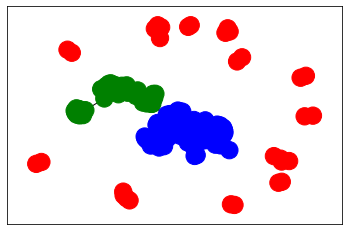

In [ ]:
G = nx.Graph()  # or DiGraph, MultiGraph, MultiDiGraph, etc
for i in range(0,len(Inter)):
  G.add_edge(Inter[i]['user1'],Inter[i]['user2'])
node_groups = []
communities = girvan_newman(G)
for com in next(communities):
  node_groups.append(list(com))
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    elif node in node_groups[1]:
        color_map.append('green')
    else:
        color_map.append('red')
        
nx.draw_networkx(G, node_color=color_map, with_labels=False)
plt.show()

In [ ]:
edge_score = edge_betweenness_centrality(G)

In [ ]:
sorted_tuples = sorted(edge_score.items(), key=operator.itemgetter(1))

In [ ]:
with open('/content/gdrive/My Drive/Colab Notebooks/Betweenness Calculation.txt', 'w') as f:
   for idx in range(0,len(sorted_tuples)):
     if(str(sorted_tuples[idx][0][0]) < sorted_tuples[idx][0][1]):
      string = str(sorted_tuples[idx][0]) + ", " + str(sorted_tuples[idx][1]) + ".\n"
     else:
      string ="('" + str(sorted_tuples[idx][0][1]) + "', '" + str(sorted_tuples[idx][0][0]) + ", " + str(sorted_tuples[idx][1]) + ".\n"
     f.write(string)


##Test

In [ ]:
G = nx.Graph()  # or DiGraph, MultiGraph, MultiDiGraph, etc
for i in range(0,len(Inter)):
  G.add_edge(Inter[i]['user1'],Inter[i]['user2'])

In [ ]:
vertices = G.nodes
vertices


NodeView(('0FMte0z-repSVWSJ_BaQTg', '0FVcoJko1kfZCrJRfssfIA', '1KQi8Ymatd4ySAd4fhSfaw', '2XYdguaaZ7dgi6fAlddujg', '2quguRdKBzul3GpRi9e1mA', '39FT2Ui8KUXwmUt6hnwy-g', '4PQhC-zTQ4ACEN0-r39JuQ', '4pc_EyanaC3ARh0MZZyouA', '7RCz4Ln_FaTvNrdwe251Dg', '7Vfy39A_totC-w70qZi0MA', '97j2wkFU46OOgm6ErRAb7w', 'Ams0iLRd0AhZZectGKA8fw', 'B0ENvYKQdNNr1Izd2r-BAA', 'BDjiEmXljD2ZHT61Iv9rrQ', 'CebjpVd3PsofCgotWp60pg', 'DKolrsBSwMTpTJL22dqJRQ', 'EiwxlbR8fb68lMgEXhcWKA', 'IXD-jdycm7m34b_Nliy82g', 'JLv2Dmfj73-I0d9N41tz1A', 'KLB3wIYUwKDPMbijIE92vg', 'KgJdBWS3ReP6TVhYWJRKmg', 'KtE55izPs1ubJn3ofF2IrA', 'LcCRMIDz1JgshpPGYfLDcA', 'OoyQYSeYNyRVOmdO3tsxYA', 'SdXxLZQQnQNUEL1rGMOQ6w', 'TjsBbWAfwxWEXPxaLNv5SQ', 'UAB1Zyg6Q0oEpXeYRf5K_g', 'XPAJ2KHkCwBA0vafF-2Zcg', 'XUEwSGOGARxW-3gPiGJKUg', '_Pn-EmWO-pFPFg81ZIEiDw', '_VTEyUzzH92X3w-IpGaXVA', 'ay4M5J28kBUf0odOQct0BA', 'bE7Yd0jI_P6g27MWEKKalA', 'bJguBxPlnTW29tRTAF0nkQ', 'bSUS0YcvS7UelmHvCzNWBA', 'bbK1mL-AyYCHZncDQ_4RgA', 'cm3_8c_NDhPcpwJQ96Aixw', 'dTeSvET2SR5LDF_J07wJAQ', 'd

In [ ]:
SG = G.subgraph(vertices)

In [ ]:
partition_sequence =[]
SG_copy = nx.Graph(SG)
my_edge_betweenness = nx.edge_betweenness_centrality(SG_copy)
most_valuable_edge = max(SG_copy.edges(), key=my_edge_betweenness.get)
SG_copy.remove_edge(*most_valuable_edge)
my_partition = list(nx.connected_components(SG_copy))
partition_sequence.append(my_partition)

partition_sequence[0]

[{'0FMte0z-repSVWSJ_BaQTg',
  '0FVcoJko1kfZCrJRfssfIA',
  '0KhRPd66BZGHCtsb9mGh_g',
  '0QREkWHGO8-Z_70qx1BIWw',
  '0gZ8E5tBWTEtGEZDuTzhzw',
  '1KQi8Ymatd4ySAd4fhSfaw',
  '1st2ltGKJ00ZcRsev-Ieew',
  '23o7tyUGlC6FCDVcyqLeFA',
  '2GUjO7NU88cPXpoffYCU8w',
  '2XYdguaaZ7dgi6fAlddujg',
  '2k8OVAPxlXHsA5X6EIoQpQ',
  '2quguRdKBzul3GpRi9e1mA',
  '2xVrxhQJUBmOyG4ML77XKw',
  '37HswRimgBEf7_US-c3CDA',
  '39FT2Ui8KUXwmUt6hnwy-g',
  '4ONcRRisDZkbV1cviA7nFw',
  '4PQhC-zTQ4ACEN0-r39JuQ',
  '4ZQq0ozRs-gXSz1z55iIDw',
  '4pc_EyanaC3ARh0MZZyouA',
  '5DgFmyjW6hkBtXtTMKl4tA',
  '5fQ9P6kbQM_E0dx8DL6JWA',
  '6YmRpoIuiq8I19Q8dHKTHw',
  '6xi9tBoZ6r_v41u_XFsSnA',
  '750rhwO7D_Cul7_GtO9Jsg',
  '79yaBDbLASfIdB-C2c8DzA',
  '7G8w2SnaC-qDVQ7_GqTxMg',
  '7RCz4Ln_FaTvNrdwe251Dg',
  '7Vfy39A_totC-w70qZi0MA',
  '8oYMqhC5fhqAK_yxRjE7dQ',
  '903YwVSoAKyzudc8LH_HMA',
  '97j2wkFU46OOgm6ErRAb7w',
  '9S52XHEyrvOv4OZxU6pCLw',
  '9SWtEX1k9AjRg93BAzMCpg',
  '9W73B44Iw8WslrTNB2CdCg',
  '9xM8upr_n9jchUDKxqSGHw',
  'A-U-K9z9oraMH7eBZ

In [ ]:
SG_copy = nx.Graph(SG)  # Create copy of subgraph to use for Girvan-Newman

partition_sequence = []
# index=1
for _ in range(SG_copy.number_of_edges()//10):
      my_edge_betweenness = nx.edge_betweenness_centrality(SG_copy)
      most_valuable_edge = max(SG_copy.edges(), key=my_edge_betweenness.get)
      # print(index,most_valuable_edge)
      SG_copy.remove_edge(*most_valuable_edge)
      my_partition = list(nx.connected_components(SG_copy))
      partition_sequence.append(my_partition)
      # index+=1
      

modularity_sequence = [nx.community.quality.modularity(SG,p) for p in partition_sequence]
modularity_sequence#, len(modularity_sequence)

[0.07852292704956375,
 0.07852292704956375,
 0.07852292704956375,
 0.5247012144965405,
 0.5247012144965405,
 0.5247012144965405,
 0.5247012144965405,
 0.5247012144965405,
 0.5247012144965405,
 0.5247012144965405,
 0.5247012144965405,
 0.624903227367301,
 0.6490742084805088,
 0.6490742084805088,
 0.6490742084805088,
 0.6527394719440014,
 0.6527394719440014,
 0.6823277043918651,
 0.6823277043918651,
 0.6823277043918651,
 0.6872550442734798,
 0.6872550442734798,
 0.6872550442734798,
 0.6872550442734798,
 0.6872550442734798,
 0.6872550442734798,
 0.6872550442734798,
 0.6872550442734798,
 0.6872550442734798,
 0.6872550442734798,
 0.6872550442734798,
 0.6872550442734798,
 0.6872550442734798,
 0.6782713182045454,
 0.6782713182045454,
 0.6782713182045454,
 0.6806079740649349,
 0.6806079740649349,
 0.6806079740649349,
 0.6806079740649349,
 0.6806079740649349,
 0.6814063482847055,
 0.6814063482847055,
 0.67874510088547,
 0.67874510088547,
 0.67874510088547,
 0.67874510088547,
 0.67874510088547,


In [ ]:
def my_modularity(partition):
        return nx.community.quality.modularity(SG, partition)
best_partition = max(partition_sequence, key=my_modularity)
best_partition_mod = nx.community.quality.modularity(SG, best_partition)
best_partition, len(best_partition), best_partition_mod

([{'0FMte0z-repSVWSJ_BaQTg',
   '0FVcoJko1kfZCrJRfssfIA',
   '0QREkWHGO8-Z_70qx1BIWw',
   '1KQi8Ymatd4ySAd4fhSfaw',
   '23o7tyUGlC6FCDVcyqLeFA',
   '2XYdguaaZ7dgi6fAlddujg',
   '2quguRdKBzul3GpRi9e1mA',
   '39FT2Ui8KUXwmUt6hnwy-g',
   '4PQhC-zTQ4ACEN0-r39JuQ',
   '4pc_EyanaC3ARh0MZZyouA',
   '79yaBDbLASfIdB-C2c8DzA',
   '7RCz4Ln_FaTvNrdwe251Dg',
   '7Vfy39A_totC-w70qZi0MA',
   '97j2wkFU46OOgm6ErRAb7w',
   '9xM8upr_n9jchUDKxqSGHw',
   'Ams0iLRd0AhZZectGKA8fw',
   'B0ENvYKQdNNr1Izd2r-BAA',
   'BDjiEmXljD2ZHT61Iv9rrQ',
   'CebjpVd3PsofCgotWp60pg',
   'ChshgCKJTdIDg17JKtFuJw',
   'DKolrsBSwMTpTJL22dqJRQ',
   'DkLSyxogCcJXY5DbTZ-f2A',
   'ELfzWgdf64VBLi5z1ECItw',
   'EiwxlbR8fb68lMgEXhcWKA',
   'IXD-jdycm7m34b_Nliy82g',
   'JLv2Dmfj73-I0d9N41tz1A',
   'JteQGisqOf_pklq7GA0Rww',
   'KHjroLTG6Ah8LyItTyB2yw',
   'KLB3wIYUwKDPMbijIE92vg',
   'KgJdBWS3ReP6TVhYWJRKmg',
   'KtE55izPs1ubJn3ofF2IrA',
   'LcCRMIDz1JgshpPGYfLDcA',
   'O9pMFJSPg80YVzpMfNikxw',
   'OoyQYSeYNyRVOmdO3tsxYA',
   'PE8s8ACYAB

In [ ]:
def create_partition_map(partition):
    partition_map = {}
    for idx, cluster_nodes in enumerate(partition):
        for node in cluster_nodes:
            partition_map[node] = idx
    return partition_map

In [ ]:
best_partition_map = create_partition_map(best_partition)
node_colors = [best_partition_map[n] for n in SG.nodes()]
best_partition_map

{'0FMte0z-repSVWSJ_BaQTg': 0,
 '0FVcoJko1kfZCrJRfssfIA': 0,
 '0KhRPd66BZGHCtsb9mGh_g': 1,
 '0QREkWHGO8-Z_70qx1BIWw': 0,
 '0gZ8E5tBWTEtGEZDuTzhzw': 2,
 '1KQi8Ymatd4ySAd4fhSfaw': 0,
 '1st2ltGKJ00ZcRsev-Ieew': 3,
 '23o7tyUGlC6FCDVcyqLeFA': 0,
 '23y0Nv9FFWn_3UWudpnFMA': 4,
 '2GUjO7NU88cPXpoffYCU8w': 5,
 '2XYdguaaZ7dgi6fAlddujg': 0,
 '2k8OVAPxlXHsA5X6EIoQpQ': 1,
 '2quguRdKBzul3GpRi9e1mA': 0,
 '2xVrxhQJUBmOyG4ML77XKw': 1,
 '37HswRimgBEf7_US-c3CDA': 1,
 '39FT2Ui8KUXwmUt6hnwy-g': 0,
 '3Vd_ATdvvuVVgn_YCpz8fw': 7,
 '453V8MlGr8y61PpsDAFjKQ': 8,
 '46HhzhpBfTdTSB5ceTx_Og': 9,
 '4ONcRRisDZkbV1cviA7nFw': 2,
 '4PQhC-zTQ4ACEN0-r39JuQ': 0,
 '4ZQq0ozRs-gXSz1z55iIDw': 3,
 '4pc_EyanaC3ARh0MZZyouA': 0,
 '5DgFmyjW6hkBtXtTMKl4tA': 1,
 '5fQ9P6kbQM_E0dx8DL6JWA': 1,
 '6YmRpoIuiq8I19Q8dHKTHw': 5,
 '6xi9tBoZ6r_v41u_XFsSnA': 5,
 '750rhwO7D_Cul7_GtO9Jsg': 1,
 '79yaBDbLASfIdB-C2c8DzA': 0,
 '7G8w2SnaC-qDVQ7_GqTxMg': 1,
 '7RCz4Ln_FaTvNrdwe251Dg': 0,
 '7Vfy39A_totC-w70qZi0MA': 0,
 '8oYMqhC5fhqAK_yxRjE7dQ': 1,
 '903YwVSo

In [ ]:
print("The original dictionary : " +  str(best_partition_map))

res = defaultdict(list)
for key, val in sorted(best_partition_map.items()):
    res[val].append(key)


The original dictionary : {'mnoe2vwouRADn97dTDkw4A': 0, '2quguRdKBzul3GpRi9e1mA': 0, '7Vfy39A_totC-w70qZi0MA': 0, 'KgJdBWS3ReP6TVhYWJRKmg': 0, 'B0ENvYKQdNNr1Izd2r-BAA': 0, 'TjsBbWAfwxWEXPxaLNv5SQ': 0, 'DKolrsBSwMTpTJL22dqJRQ': 0, 'bHufZ2OTlC-OUxBDRXxViw': 0, 'Tk_FWXueutKii3f9yJFsdw': 0, 'waN6iwcphiVEoCews4f4CA': 0, '7RCz4Ln_FaTvNrdwe251Dg': 0, 'ChshgCKJTdIDg17JKtFuJw': 0, 'ma6206bmu-a_Ja7Iv-yRCw': 0, 'Ams0iLRd0AhZZectGKA8fw': 0, 'KtE55izPs1ubJn3ofF2IrA': 0, 'CebjpVd3PsofCgotWp60pg': 0, 'jPcrABeWgWlTPi-E0Op_aA': 0, 'bSUS0YcvS7UelmHvCzNWBA': 0, 'ELfzWgdf64VBLi5z1ECItw': 0, '0FMte0z-repSVWSJ_BaQTg': 0, 'OoyQYSeYNyRVOmdO3tsxYA': 0, '4PQhC-zTQ4ACEN0-r39JuQ': 0, 'dTeSvET2SR5LDF_J07wJAQ': 0, 'qtOCfMTrozmUSHWIcohc6Q': 0, 'LcCRMIDz1JgshpPGYfLDcA': 0, '79yaBDbLASfIdB-C2c8DzA': 0, 'JLv2Dmfj73-I0d9N41tz1A': 0, 'kKTcYPz47sCDH1_ylnE4ZQ': 0, 'O9pMFJSPg80YVzpMfNikxw': 0, 'e8uzNcSC5tQMD22GNAQEQA': 0, 'p9942XebvxZ9ubHm4SXmMQ': 0, 'DkLSyxogCcJXY5DbTZ-f2A': 0, '97j2wkFU46OOgm6ErRAb7w': 0, 'XUEwSGOGARxW-3g

In [ ]:
for k in sorted(dict(res), key=lambda k: len(dict(res)[k])):
        print(k,"/", len(dict(res)[k]))
sorte = sorted(dict(res), key=lambda k: len(dict(res)[k]))

4 / 2
7 / 2
8 / 2
9 / 2
14 / 2
16 / 2
17 / 2
18 / 2
10 / 3
6 / 3
11 / 4
15 / 4
12 / 5
13 / 6
5 / 11
3 / 14
2 / 33
1 / 46
0 / 77


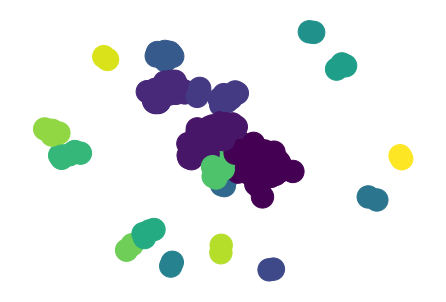

In [ ]:
# Plot full subgraph
pos = nx.spring_layout(SG) 
nx.draw(SG, node_color=node_colors, pos=pos, node_size=500) 

In [ ]:

cc = nx.clustering(SG)

In [ ]:
templist = []
for i in range(0,len (dict(res))):
  templist.append(dict(res)[i])

In [ ]:
temp = []
for i in range(0,len(templist)):
  temp.append(len(templist[i]))

In [ ]:
unique_temp = []
for x in temp:
  if x not in unique_temp:
      unique_temp.append(x)


In [ ]:
unique_temp.sort()

In [ ]:
txt = ""
for idx in range(0,len(unique_temp)):
  for i in range(0,len(templist)):
    if(unique_temp[idx] == len(templist[i])):
      for j in range(0,len(templist[i])):
        if(j == len(templist[i])-1):
          txt = txt + "'" + templist[i][j] +"'."
        else:
          txt = txt + "'" + templist[i][j] +"',"
    txt = txt + "\n"

In [ ]:
lines = txt.split("\n")
non_empty_lines = [line for line in lines if line.strip() != ""]
new = ""
for line in non_empty_lines:
      new += line + "\n"

In [ ]:
with open('/content/gdrive/My Drive/Colab Notebooks/4.2.txt', 'w') as f:
 f.write(new)